<a href="https://colab.research.google.com/github/fmWaithaka/-Analyzing-Airbnb-Listings-in-Singapore/blob/main/Analyzing_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Airbnb Listings in Singapore

## Data Loading and Exploration
* Download and load both datasets using the Pandas library.
* Explore the first few rows of each dataset to understand their structure and
content

In [ ]:
import pandas as pd

# Load the listing data
url = "http://data.insideairbnb.com/singapore/sg/singapore/2023-09-23/data/listings.csv.gz"

# Read the CSV file into a DataFrame
listing_df = pd.read_csv(url)

# Display the first few rows of the DataFrame
listing_df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,71609,https://www.airbnb.com/rooms/71609,20230923135002,2023-09-23,previous scrape,Villa in Singapore · ★4.44 · 2 bedrooms · 3 be...,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,...,4.78,4.26,4.32,NaN,f,5,0,5,0,0.14
1,71896,https://www.airbnb.com/rooms/71896,20230923135002,2023-09-23,previous scrape,Home in Singapore · ★4.16 · 1 bedroom · 1 bed ...,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,...,4.43,4.17,4.04,NaN,f,5,0,5,0,0.16
2,71903,https://www.airbnb.com/rooms/71903,20230923135002,2023-09-23,previous scrape,Home in Singapore · ★4.41 · 1 bedroom · 2 beds...,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,...,4.64,4.50,4.36,NaN,f,5,0,5,0,0.31
3,275343,https://www.airbnb.com/rooms/275343,20230923135002,2023-09-23,city scrape,Rental unit in Singapore · ★4.40 · 1 bedroom ·...,**IMPORTANT NOTES: READ BEFORE YOU BOOK! <br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.42,4.53,4.63,S0399,t,52,1,51,0,0.17
4,275344,https://www.airbnb.com/rooms/275344,20230923135002,2023-09-23,city scrape,Rental unit in Singapore · ★4.27 · 1 bedroom ·...,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.50,4.63,4.13,S0399,t,52,1,51,0,0.12


In [ ]:
# Check the shape
listing_df.shape

(3483, 75)

In [ ]:
# Check the columns names
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
# Check the info (data type, missing values)
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3483 non-null   int64  
 1   listing_url                                   3483 non-null   object 
 2   scrape_id                                     3483 non-null   int64  
 3   last_scraped                                  3483 non-null   object 
 4   source                                        3483 non-null   object 
 5   name                                          3483 non-null   object 
 6   description                                   3439 non-null   object 
 7   neighborhood_overview                         2289 non-null   object 
 8   picture_url                                   3483 non-null   object 
 9   host_id                                       3483 non-null   i

In [ ]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.483000e+03,3.483000e+03,3.483000e+03,3483.000000,3483.000000,3483.000000,3483.000000,3483.000000,0.0,1995.000000,...,1884.000000,1884.000000,1885.000000,1884.000000,1884.000000,3483.000000,3483.000000,3483.000000,3483.000000,1918.000000
mean,2.607039e+17,2.023092e+13,1.544212e+08,87.198392,145.719495,1.310944,103.843322,2.817112,NaN,1.447118,...,4.497346,4.725648,4.707687,4.691306,4.440632,50.807063,39.910996,10.165662,0.357450,0.558180
std,3.810257e+17,0.000000e+00,1.530722e+08,155.623487,249.134868,0.032431,0.043540,2.199845,NaN,0.747168,...,0.626993,0.508401,0.561206,0.475238,0.632213,72.325185,71.447953,19.831654,1.912801,1.139863
min,7.160900e+04,2.023092e+13,2.366600e+04,1.000000,1.000000,1.221690,103.634572,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.476517e+07,2.023092e+13,2.903270e+07,3.000000,5.000000,1.290998,103.834045,2.000000,NaN,1.000000,...,4.270000,4.670000,4.670000,4.570000,4.207500,3.000000,0.000000,0.000000,0.000000,0.050000
50%,4.230188e+07,2.023092e+13,1.075995e+08,14.000000,20.000000,1.304867,103.846020,2.000000,NaN,1.000000,...,4.670000,4.915000,4.920000,4.850000,4.570000,13.000000,1.000000,2.000000,0.000000,0.170000
75%,6.927294e+17,2.023092e+13,2.388916e+08,79.000000,126.000000,1.318060,103.860185,4.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,70.000000,27.000000,9.000000,0.000000,0.627500
max,9.859401e+17,2.023092e+13,5.368571e+08,571.000000,847.000000,1.457802,103.989570,16.000000,NaN,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,253.000000,238.000000,91.000000,18.000000,20.930000


In [ ]:
# Check the unique values
listing_df.describe(include=["object", "bool"])

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,3483,3483,3483,3483,3439,2289,3483,3483,3483,3483,...,3483,3464,3483,3483,3483,3483,1918,1918,1295,3483
unique,3483,1,2,1484,2741,1019,3286,915,728,775,...,4,39,2815,577,2,1,1333,1012,105,2
top,https://www.airbnb.com/rooms/71609,2023-09-23,city scrape,Rental unit in Singapore · 1 bedroom · 1 bed ·...,"Located in the heart of Singapore, 36 Club St ...",- Apartment is within lavender neighbourhood (...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/138649185,Apac,2017-07-05,...,Private room,1 bath,"[""Self check-in"", ""Bed linens"", ""Paid parking ...",$49.00,t,2023-09-23,2020-01-01,2023-09-18,Authorised Serviced Apartment,f
freq,1,3483,2701,200,30,73,11,253,253,253,...,1627,1217,50,73,3101,3483,10,26,766,2191


Let's do the same for review data

In [ ]:
# Load the review data
url = "http://data.insideairbnb.com/singapore/sg/singapore/2023-09-23/data/reviews.csv.gz"

# Read the CSV file into a DataFrame
review_df = pd.read_csv(url)

# Display the first few rows of the DataFrame
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,71609,793880,2011-12-19,1456140,Max,The rooms were clean and tidy. Beds very comfo...
1,3209752,523972161,2019-09-05,20987832,Eng Hui,"Thank you for making me feel at home, it is su..."
2,3209752,527054740,2019-09-10,3963956,Lug,"An absolutely amazing place. It’s clean, styli..."
3,3209752,528926785,2019-09-14,66599486,Andrew,This location is private yet it is only 400m w...
4,3209752,538619865,2019-09-30,110050140,Damien,Jeremy is a great host that will make your sta...


In [ ]:
review_df.shape

(35698, 6)

In [ ]:
review_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     35698 non-null  int64 
 1   id             35698 non-null  int64 
 2   date           35698 non-null  object
 3   reviewer_id    35698 non-null  int64 
 4   reviewer_name  35698 non-null  object
 5   comments       35691 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
review_df.describe(include=["object"])

,date,reviewer_name,comments
count,35698,35698,35691
unique,3561,15657,33904
top,2019-09-23,David,Good
freq,46,192,142


## Data Cleaning
* Identify and handle missing data in both datasets. Decide whether to fill
the missing values or drop columns as needed.
* Examine the data types of various columns and assign suitable data types
to each column. Demonstrate the efficiency of these changes by
showcasing the memory usage before and after altering the data types.

In [ ]:
# Identify the missing data on the listing_df
missing_values_listings = listing_df.isnull().sum()

missing_values_listings[missing_values_listings > 0]

description                      44
neighborhood_overview          1194
host_location                  1247
host_about                     1134
host_response_time              758
host_response_rate              758
host_acceptance_rate            923
host_is_superhost               189
host_neighbourhood              233
neighbourhood                  1194
bathrooms                      3483
bathrooms_text                   19
bedrooms                       1488
beds                             97
calendar_updated               3483
first_review                   1565
last_review                    1565
review_scores_rating           1565
review_scores_accuracy         1599
review_scores_cleanliness      1599
review_scores_checkin          1599
review_scores_communication    1598
review_scores_location         1599
review_scores_value            1599
license                        2188
reviews_per_month              1565
dtype: int64

In [ ]:
#Fill missing values in text columns with "Not available"
text_columns = ['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_neighbourhood', 'neighbourhood', 'bathrooms_text', 'first_review', 'last_review']
listing_df[text_columns] = listing_df[text_columns].fillna("Not available")

In [ ]:
# Fill missing values in numerical columns with the mean
numerical_columns = ['bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
listing_df[numerical_columns] = listing_df[numerical_columns].fillna(listing_df[numerical_columns].mean())

In [ ]:
# Drop the columns High Percentage of Missing Values
columns_to_drop = ['bathrooms', 'calendar_updated', 'license']
listing_df = listing_df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Display unique values in host_response_time and host_response_rate
unique_response_time = listing_df['host_response_time'].unique()
unique_response_rate = listing_df['host_response_rate'].unique()

print("Unique values in host_response_time:")
print(unique_response_time)

print("\nUnique values in host_response_rate:")
print(unique_response_rate)

Unique values in host_response_time:
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']

Unique values in host_response_rate:
['100%' '75%' nan '50%' '0%' '82%' '60%' '40%' '57%' '67%' '73%' '93%'
 '89%' '88%' '90%' '95%' '92%' '20%' '94%' '80%' '97%' '33%' '85%' '70%'
 '96%' '98%' '17%' '99%' '10%' '77%' '83%' '86%' '65%' '30%' '78%' '91%'
 '46%' '36%']


Since `host_response_time` is categorical, you can fill missing values with a category that indicates non-response, such as "Not available"

In [ ]:
listing_df['host_response_time'].fillna('Not available', inplace=True)


Since `host_response_rate` is numerical, you might consider filling missing values with a specific value (e.g., the mean response rate) or with a distinct value that represents missing data, such as -1.

In [ ]:
# Convert 'host_response_rate' to a numerical format (remove '%' sign)
listing_df['host_response_rate'] = listing_df['host_response_rate'].str.rstrip('%').astype('float') / 100.0

# Fill missing values with the mean or another appropriate strategy
listing_df['host_response_rate'].fillna(listing_df['host_response_rate'].mean(), inplace=True)


In [ ]:
# Select only the host_response_time and host_response_rate columns
selected_columns = ['host_response_time', 'host_response_rate']
subset_df = listing_df[selected_columns]

# Display the DataFrame with only the selected columns
print(subset_df.head(20))

    host_response_time  host_response_rate
0   within a few hours            1.000000
1   within a few hours            1.000000
2   within a few hours            1.000000
3       within an hour            1.000000
4       within an hour            1.000000
5   within a few hours            1.000000
6   within a few hours            0.750000
7       within an hour            1.000000
8       within an hour            1.000000
9   within a few hours            0.750000
10  within a few hours            0.750000
11       Not available            0.894741
12  within a few hours            1.000000
13       Not available            0.894741
14       Not available            0.894741
15       Not available            0.894741
16        within a day            1.000000
17       Not available            0.894741
18       Not available            0.894741
19       Not available            0.894741


In [ ]:
# Display unique values in neighbourhood and host_neighbourhood
unique_neighbourhood = listing_df['neighbourhood'].unique()
unique_host_neighbourhood = listing_df['host_neighbourhood'].unique()

print("Unique values in neighbourhood:")
print(unique_neighbourhood)

print("\nUnique values in host_neighbourhood:")
print(unique_host_neighbourhood)


Unique values in neighbourhood:
['Not available' 'Singapore, Singapore' 'Changi, Singapore'
 'Singapore, Chinatown, Outram, Singapore' 'Orchard , Singapore'
 'Singapore, Bukit Timah, Singapore' 'Singapore, 207557, Singapore'
 'Queensway/Alexandra, Singapore' 'Singapore, SINGAPORE, Singapore'
 'Singapore, NA, Singapore' 'Singapore,   , Singapore'
 'Singapore, Novena, Singapore' 'SINGAPORE, Singapore'
 'Singapore, Jalan Eunos, Singapore' 'West Coast, 新加坡, Singapore'
 'Singapore' 'Singapore, Sg, Singapore' 'Singpapore , Singapore'
 'Singapore , Singapore' 'Tanjong Pagar, Singapore'
 'Woodlands , Singapore' 'Singapore, SG, Singapore' 'Katong, Singapore'
 'Clementi, Singapore' 'Orchard, Singapore' 'Little India, Singapore'
 'Jurong, Singapore' 'n/a, Singapore' 'Singapore, *, Singapore'
 'Novena /Toa Payoh, Singapore' 'Jurong East, Singapore'
 'Potong Pasir, Singapore' 'Jurong East, Singapore , Singapore'
 'Potong Pasir, Singapore , Singapore' 'Farrer Park, Singapore'
 'Singapore, Aljunied, 

In [ ]:
missing_values_listings = listing_df.isnull().sum()

missing_values_listings[missing_values_listings > 0]

host_acceptance_rate    923
host_is_superhost       189
dtype: int64

In [ ]:
listing_df["host_acceptance_rate"].unique()

array(['100%', '95%', nan, '91%', '0%', '80%', '98%', '75%', '88%', '66%',
       '77%', '89%', '49%', '86%', '20%', '50%', '67%', '60%', '22%',
       '84%', '63%', '72%', '62%', '57%', '25%', '70%', '96%', '92%',
       '90%', '93%', '99%', '85%', '21%', '40%', '97%', '71%', '33%',
       '52%', '73%', '58%', '94%', '30%', '26%', '79%', '55%', '82%',
       '46%', '9%', '64%', '6%', '54%', '78%', '53%', '81%', '27%', '61%',
       '87%', '24%'], dtype=object)

In [ ]:
# Make host_acceptance_rate numerical and then fill the NaN value
listing_df['host_acceptance_rate'] = listing_df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
listing_df['host_acceptance_rate'].fillna(listing_df['host_acceptance_rate'].mean(), inplace=True)

In [ ]:
listing_df["host_is_superhost"].unique()

array(['f', 't', nan], dtype=object)

For `host_is_superhost`, which typically contains categorical values like 't' and 'f', you can fill missing values with the most frequent category.

In [ ]:
listing_df['host_is_superhost'].fillna(listing_df['host_is_superhost'].mode()[0], inplace=True)


In [ ]:
missing_values_listings = listing_df.isnull().sum()

missing_values_listings[missing_values_listings > 0]

Series([], dtype: int64)

In [ ]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3483 non-null   int64  
 1   listing_url                                   3483 non-null   object 
 2   scrape_id                                     3483 non-null   int64  
 3   last_scraped                                  3483 non-null   object 
 4   source                                        3483 non-null   object 
 5   name                                          3483 non-null   object 
 6   description                                   3483 non-null   object 
 7   neighborhood_overview                         3483 non-null   object 
 8   picture_url                                   3483 non-null   object 
 9   host_id                                       3483 non-null   i

Downcasting numerical columns and converting object columns to categorical types can significantly reduce memory usage, especially for large datasets.

In [ ]:
# Display the data types of columns before changes
print("Data types before changes:")
print(listing_df.dtypes)

# Measure memory usage before changes
memory_before = listing_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nMemory usage before changes: {memory_before:.2f} MB\n")

# Convert columns to appropriate data types
# Convert numerical columns to more memory-efficient types
numerical_columns = listing_df.select_dtypes(include=['float64', 'int64']).columns
listing_df[numerical_columns] = listing_df[numerical_columns].apply(pd.to_numeric, downcast='float')

# Convert object columns to categorical if appropriate
object_columns = listing_df.select_dtypes(include='object').columns
listing_df[object_columns] = listing_df[object_columns].astype('category')

# Display the data types of columns after changes
print("Data types after changes:")
print(listing_df.dtypes)

# Measure memory usage after changes
memory_after = listing_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nMemory usage after changes: {memory_after:.2f} MB\n")

# Calculate memory savings
memory_savings = (1 - memory_after / memory_before) * 100
print(f"Memory savings: {memory_savings:.2f}%")


Data types before changes:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 72, dtype: object

Memory usage before changes: 17.04 MB

Data types after changes:
id                                               float64
listing_url                                     category
scrape_id                                        float64
last_scraped                                    category
source                               

In [ ]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            3483 non-null   float64 
 1   listing_url                                   3483 non-null   category
 2   scrape_id                                     3483 non-null   float64 
 3   last_scraped                                  3483 non-null   category
 4   source                                        3483 non-null   category
 5   name                                          3483 non-null   category
 6   description                                   3483 non-null   category
 7   neighborhood_overview                         3483 non-null   category
 8   picture_url                                   3483 non-null   category
 9   host_id                                       3483 n

### Do the cleaning for reviews

In [ ]:
# Identify the missing data on the listing_df
missing_values_listings = review_df.isnull().sum()

missing_values_listings[missing_values_listings > 0]

comments    7
dtype: int64

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     35698 non-null  int64 
 1   id             35698 non-null  int64 
 2   date           35698 non-null  object
 3   reviewer_id    35698 non-null  int64 
 4   reviewer_name  35698 non-null  object
 5   comments       35691 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
review_df['comments'].fillna('Not available', inplace=True)


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     35698 non-null  int64 
 1   id             35698 non-null  int64 
 2   date           35698 non-null  object
 3   reviewer_id    35698 non-null  int64 
 4   reviewer_name  35698 non-null  object
 5   comments       35698 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.6+ MB


In [ ]:
# Display the data types of columns before changes
print("Data types before changes:")
print(review_df.dtypes)

# Measure memory usage before changes
memory_before = review_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nMemory usage before changes: {memory_before:.2f} MB\n")

# Convert columns to appropriate data types
# Example: Convert numerical columns to more memory-efficient types
numerical_columns = review_df.select_dtypes(include=['int64']).columns
review_df[numerical_columns] = review_df[numerical_columns].apply(pd.to_numeric, downcast='integer')

# Example: Convert object columns to categorical if appropriate
object_columns = review_df.select_dtypes(include='object').columns
review_df[object_columns] = review_df[object_columns].astype('category')

# Display the data types of columns after changes
print("Data types after changes:")
print(review_df.dtypes)

# Measure memory usage after changes
memory_after = review_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nMemory usage after changes: {memory_after:.2f} MB\n")

# Calculate memory savings
memory_savings = (1 - memory_after / memory_before) * 100
print(f"Memory savings: {memory_savings:.2f}%")

Data types before changes:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

Memory usage before changes: 16.64 MB

Data types after changes:
listing_id          int64
id                  int64
date             category
reviewer_id         int32
reviewer_name    category
comments         category
dtype: object

Memory usage after changes: 17.49 MB

Memory savings: -5.11%


## Exploratory Data Analysis (EDA)
* Calculate and visualize the distribution of property types ('property_type'
column) among the listings.
* Analyze the distribution of room types ('room_type' column) among the
listings.
* Explore and visualize the average price of listings based on room type.

In [ ]:
# import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Calculate the distribution of property types

In [ ]:
property_type_distribution = listing_df['property_type'].value_counts()
print("Distribution of Property Types:")
print(property_type_distribution)


Distribution of Property Types:
Private room in rental unit           679
Entire rental unit                    660
Entire condo                          446
Entire serviced apartment             362
Private room in condo                 216
Room in hotel                         198
Private room in home                  175
Room in boutique hotel                129
Private room in serviced apartment     67
Room in hostel                         64
Private room in townhouse              54
Shared room in hostel                  49
Room in aparthotel                     47
Entire home                            34
Private room in bungalow               32
Shared room in rental unit             27
Private room in hostel                 26
Private room                           23
Private room in bed and breakfast      23
Private room in guesthouse             20
Room in serviced apartment             16
Shared room in bed and breakfast       16
Shared room in guesthouse              15
En

The most common property types include "Private room in rental unit," "Entire rental unit," "Entire condo," and "Entire serviced apartment."

Private rooms in rental units and entire rental units are among the most frequent property types, suggesting a preference for more private and self-contained accommodations.

Some property types have lower counts, such as "Casa particular," "Entire villa," "Campsite," and "Shared room in riad," indicating less common but unique accommodation options.

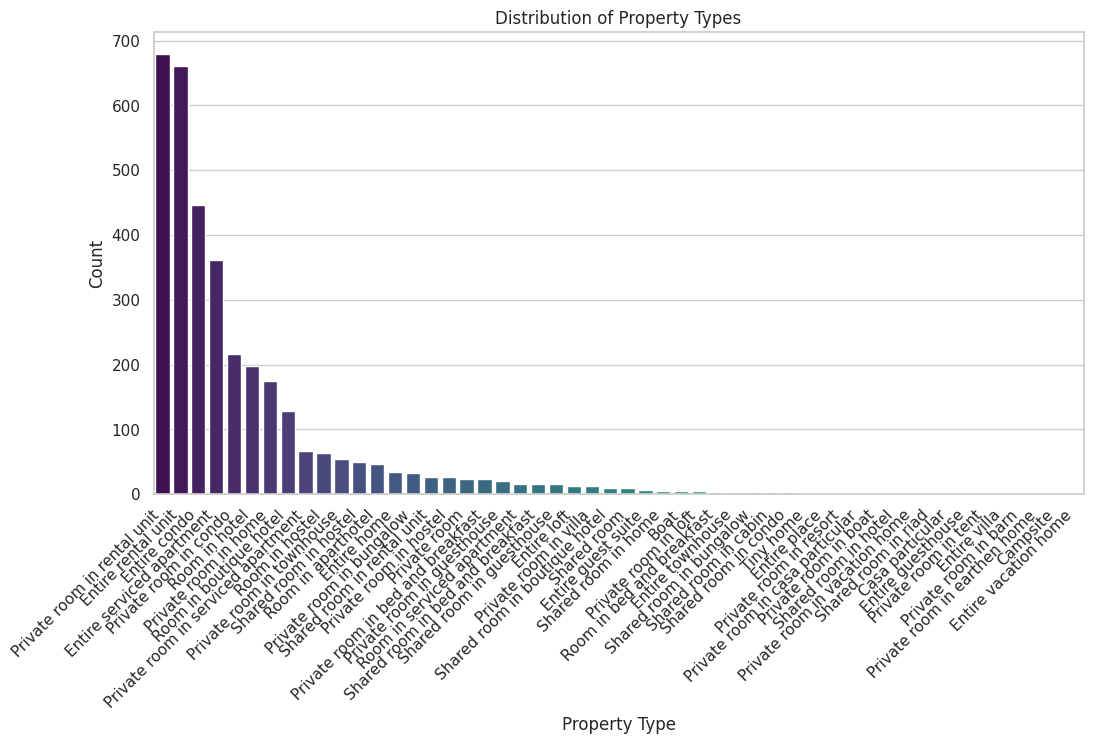

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the property type distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', data=listing_df, order=listing_df['property_type'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()


### Calculate the Distribution of Room Types

In [ ]:
room_type_distribution = listing_df['room_type'].value_counts()
print("Distribution of Room Types:")
print(room_type_distribution)


Distribution of Room Types:
Private room       1627
Entire home/apt    1585
Shared room         143
Hotel room          128
Name: room_type, dtype: int64


The most popular room types are "Private room" and "Entire home/apt," with counts of 1627 and 1585, respectively.

The prevalence of "Private room" and "Entire home/apt" suggests a preference among guests for private and more self-contained accommodation.

"Shared room" and "Hotel room" have lower counts, indicating that these room types are less common among the listings.

While there is a difference in counts between private rooms and entire homes/apartments, the distribution is relatively balanced, offering a mix of options to potential guests.

The presence of "Shared room" suggests that there is a consideration for guests looking for shared accommodations, possibly targeting budget-conscious travelers or those interested in a communal living experience.

 Visualize the Distribution

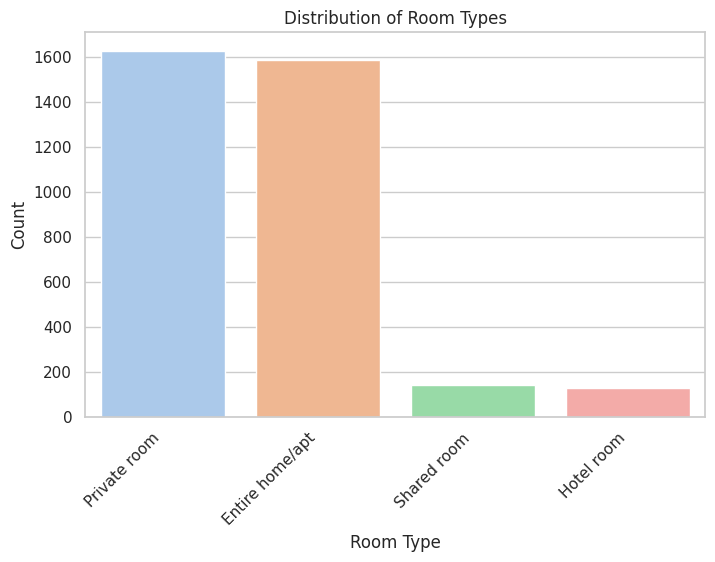

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the room type distribution with a different color
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=listing_df, order=listing_df['room_type'].value_counts().index, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


### Explore and visualize the average price of listings based on room type.

In [ ]:
# Let's first see what dtype of the column
listing_df['price'].dtype

CategoricalDtype(categories=['$1,000.00', '$1,010.00', '$1,018.00', '$1,025.00',
                  '$1,030.00', '$1,060.00', '$1,061.00', '$1,073.00',
                  '$1,110.00', '$1,180.00',
                  ...
                  '$973.00', '$975.00', '$98.00', '$983.00', '$986.00',
                  '$989.00', '$99.00', '$990.00', '$998.00', '$999.00'],
, ordered=False)

Convert Price to Numeric to ensure that the `price` column is in a numeric format for calculations.

In [ ]:
# Convert 'price' to strings and then to numeric, handling errors
listing_df['price'] = pd.to_numeric(listing_df['price'].astype(str).replace('[\$,]', '', regex=True), errors='coerce')

In [ ]:
# Let's check the new dtype
listing_df['price'].dtype

dtype('float64')

It's now ready for calculation.

Now we calculate average price by room type

In [ ]:
average_price_by_room_type = listing_df.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("Average Price by Room Type:")
print(average_price_by_room_type)


Average Price by Room Type:
room_type
Hotel room         1010.445312
Entire home/apt     366.774763
Private room        168.912723
Shared room         108.853147
Name: price, dtype: float64


The room type with the highest average price is "Hotel room," with an average price of $1,010.45. Hotel rooms typically tend to be more expensive due to additional services and amenities.

Entire home/apt" has the second-highest average price, amounting to $366.77. Entire homes or apartments usually offer a higher level of privacy and amenities, contributing to a higher average price.

"Private room" has a moderate average price of $168.91. Private rooms are often more affordable than entire homes/apartments, appealing to budget-conscious travelers.

"Shared room" has the lowest average price, at $108.85. Shared rooms are typically the most budget-friendly option, suitable for travelers who prioritize cost savings over privacy.

The presence of lower-priced options like "Shared room" suggests that there are accommodations available for budget-conscious travelers.

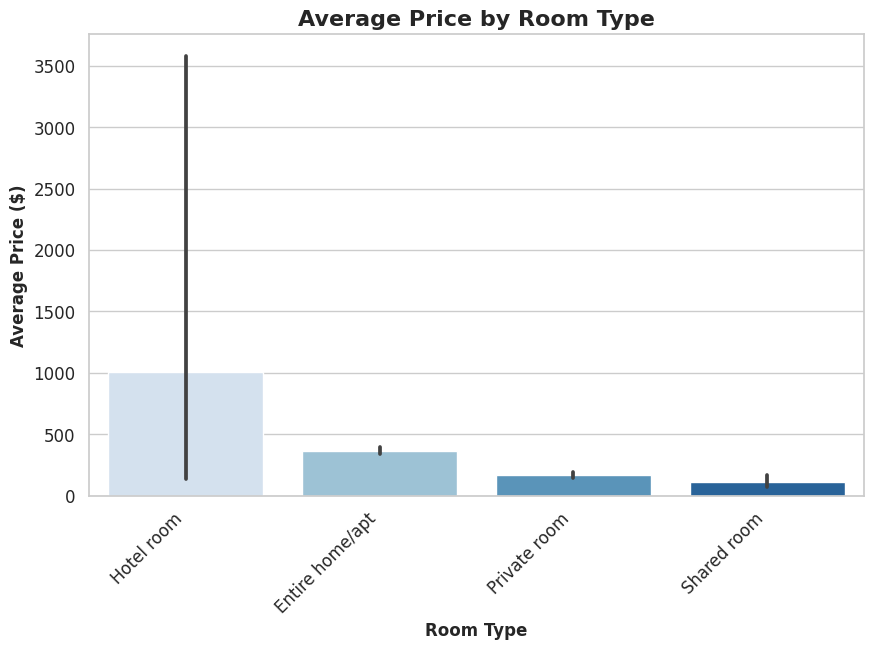

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the average price by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=listing_df, order=average_price_by_room_type.index, palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Room Type', fontweight='bold', fontsize=16)
plt.xlabel('Room Type', fontweight='bold', fontsize=12)
plt.ylabel('Average Price ($)', fontweight='bold', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


## Textual Data Analysis
* Analyze the 'amenities' column in the "Detailed Listings Data" dataset,
which contains textual data. Calculate the most common amenities
among listings.
* Create a word cloud visualization of amenities to highlight popular features.

### Analyze the 'amenities' Column

In [ ]:
from wordcloud import WordCloud

Let's first check how the column looks like


In [ ]:
listing_df['amenities'].head()

0    ["Private backyard \u2013 Fully fenced", "Sham...
1    ["Private backyard \u2013 Fully fenced", "Sham...
2    ["Shampoo", "Self check-in", "Coffee maker", "...
3    ["Fire extinguisher", "Self check-in", "Bed li...
4    ["Fire extinguisher", "Drying rack for clothin...
Name: amenities, dtype: category
Categories (2815, object): ['["40\" TV with standard cable", "Shampoo", "F..., '["40\" TV with standard cable", "Shampoo", "F...,
                            '["40\" TV with standard cable", "Shampoo", "F..., '["40\" TV with standard cable", "Shampoo", "F...,
                            ..., '["Wifi", "Gym", "Air conditioning", "Private ...,
                            '["Wifi", "Pets allowed", "Smoking allowed"]', '["Wifi", "Smoke alarm", "Free parking on prem...,
                            '[]']

In [ ]:
# Combine all amenities into a single string
all_amenities = ' '.join(listing_df['amenities'].astype(str))

# Split the combined string into individual amenities
individual_amenities = all_amenities.replace('{', '').replace('}', '').replace('"', '').split(',')

# Count the occurrences of each amenity
amenities_count = pd.Series(individual_amenities).value_counts()
print("Most Common Amenities:")
print(amenities_count.head())


Most Common Amenities:
 Wifi                3295
 Air conditioning    2982
 Kitchen             2662
 Washer              2516
 Iron                2499
dtype: int64


Wifi is the most prevalent amenity, indicating its essential role in accommodation offerings.

Air conditioning is highly common, contributing to the comfort and climate control of listed spaces.

Kitchens are widely available, suggesting a preference for self-catering options among guest

The presence of washers highlights the convenience of on-site laundry facilities for guests.

Irons are frequently provided, addressing the needs of guests for maintaining their clothing

 ### Create a Word Cloud Visualization
  >* A word cloud is a visual representation of text data, where words are displayed in varying sizes based on their frequency or importance within the given text.
* The word cloud visually represents the frequency of words (in this case, amenities) in a dataset. More frequent words are displayed with larger font sizes.



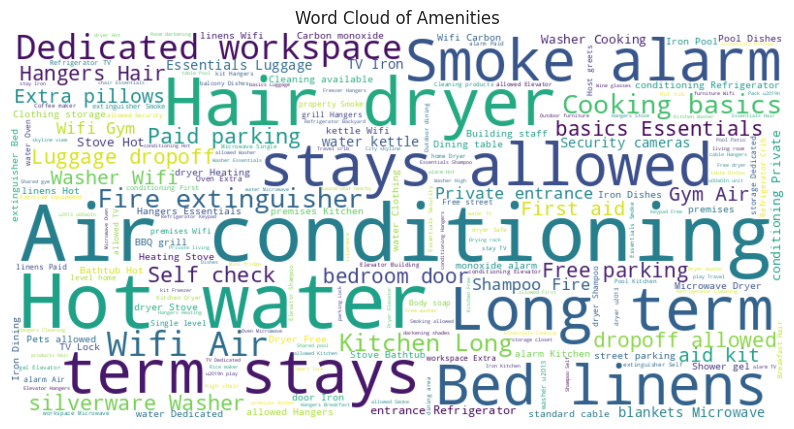

In [ ]:
# Generate a word cloud from the amenities text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_amenities)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Amenities')
plt.show()


## Geospatial Analysis
* Visualize the geographical distribution of listings in Singapore using the
'latitude' and 'longitude' columns. You can use scatter plots on a map
background to represent listing locations.

In [ ]:
# Import Folium library that allows you to create interactive maps
import folium
from folium.plugins import MarkerCluster

We can draw a scatter plot

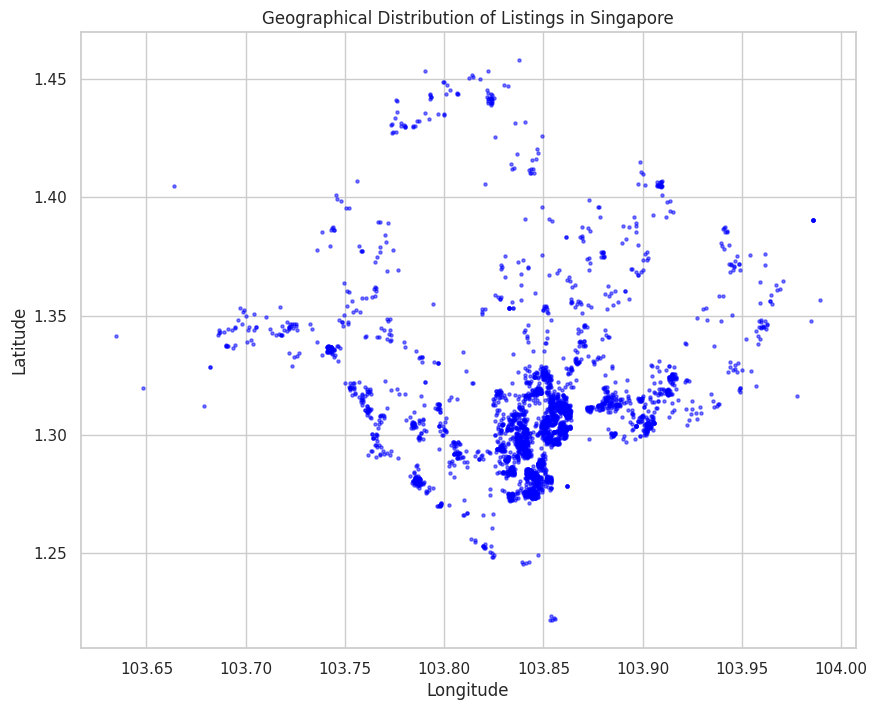

In [ ]:
# Scatter plot using Matplotlib (optional)
plt.figure(figsize=(10, 8))
plt.scatter(listing_df['longitude'], listing_df['latitude'], alpha=0.5, c='blue', s=5)
plt.title('Geographical Distribution of Listings in Singapore')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Let's now draw an interactive Map with Folium

In [ ]:
# Create an interactive map with Folium
map_center = [listing_df['latitude'].mean(), listing_df['longitude'].mean()]
sg_map = folium.Map(location=map_center, zoom_start=12)

# Add markers to the map using MarkerCluster for better visualization
marker_cluster = MarkerCluster().add_to(sg_map)
for index, row in listing_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map
sg_map.save("listings_map.html")  # Save the map as an HTML file
sg_map


## Reviews Analysis
* Analyze the 'number_of_reviews' column to understand the distribution of
review counts.
* Calculate the average review score for listings with available review scores.
* Visualize the distribution of review scores using histograms or box plots.

### Analyze the `number_of_reviews` Column

Summary Statistics of 'number_of_reviews':
count    3483.000000
mean       10.249210
std        32.323757
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max       665.000000
Name: number_of_reviews, dtype: float64


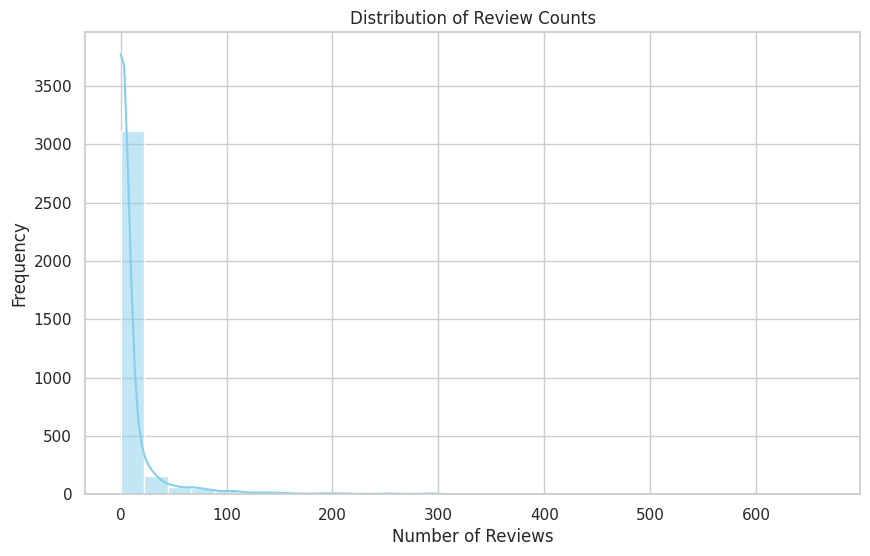

In [ ]:
# Summary statistics of the 'number_of_reviews' column
print("Summary Statistics of 'number_of_reviews':")
print(listing_df['number_of_reviews'].describe())

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(listing_df['number_of_reviews'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


The average number of reviews per listing is approximately 10.25. This suggests that, on average, listings have received around 10 reviews.

The standard deviation is relatively high at 32.32, indicating a significant variability in the number of reviews among listings. Some listings have a much higher number of reviews than the average.

### Filter Listings with Available Review Scores

In [ ]:
# Calculate the average review score for all listings
average_review_score = listing_df['review_scores_rating'].mean()

# Print the result
print("Average Review Score for All Listings:", average_review_score)

Average Review Score for All Listings: 4.4595103


### Visualize the distribution of review scores using histograms or box plots.

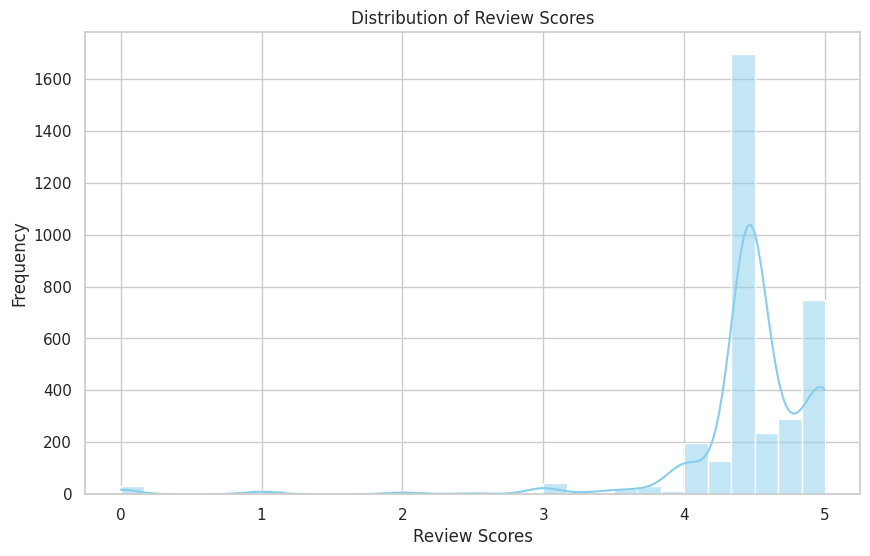

In [ ]:
## Use histogram

# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram of review scores
plt.figure(figsize=(10, 6))
sns.histplot(listing_df['review_scores_rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.show()

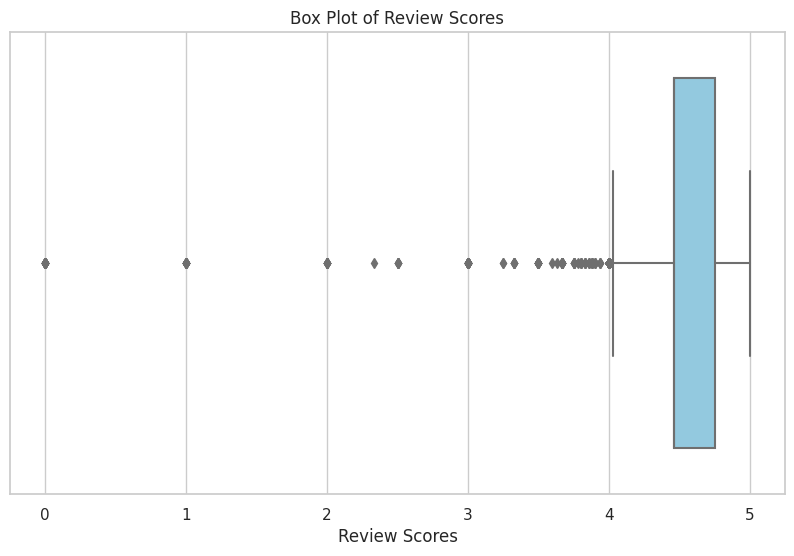

In [ ]:
# Using Box Plot
# Create a box plot of review scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=listing_df['review_scores_rating'].dropna(), color='skyblue')
plt.title('Box Plot of Review Scores')
plt.xlabel('Review Scores')
plt.show()


## Advanced Textual Data Analysis
* Divide the reviews into two groups based on their review scores (e.g.,
positive and negative).
* Analyze and visualize the content of reviews in each group.
* Create word clouds for each group to highlight frequently occurring words
in positive and negative reviews.

###Divide Reviews into Positive and Negative Groups

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Assuming 'review_column' is the column in review_df that contains the comments
review_df['sentiment_score'] = review_df['comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify reviews as positive or negative based on sentiment score
review_df['review_sentiment'] = review_df['sentiment_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')

# Display the count of positive and negative reviews
print(review_df['review_sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


positive    34361
negative     1337
Name: review_sentiment, dtype: int64


In [ ]:
# Set the threshold for positive and negative reviews
threshold_score = 8

# Create a new column 'review_sentiment' based on the threshold
review_df['review_sentiment'] = review_df['comments'].apply(
    lambda x: 'Positive' if len(str(x)) > 0 and 'good' in x.lower() else 'Negative' if len(str(x)) > 0 else 'Not Reviewed'
)


###  Analyze and Visualize the Content of Reviews
Creat a word cloud

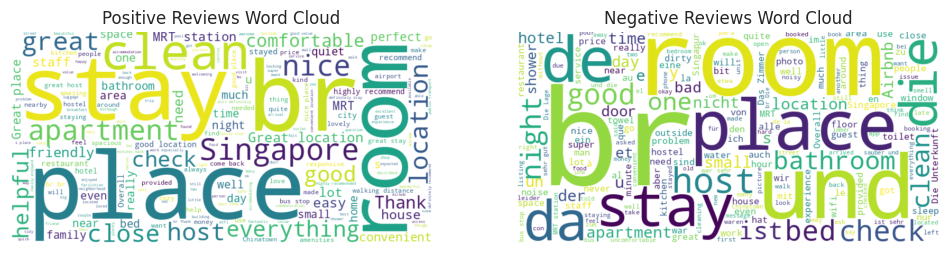

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = review_df[review_df['review_sentiment'] == 'positive']['comments']
negative_reviews = review_df[review_df['review_sentiment'] == 'negative']['comments']

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


## Conclusion
* Summarize your findings and insights from the analysis.
* Provide recommendations or observations based on the data, including
insights from the advanced textual analysis.

**Summary of Findings:**

1.**Geospatial Analysis:**

> * Visualizing the geographical distribution of listings revealed that Airbnb listings are concentrated in certain areas of Singapore.
* Further analysis could explore the reasons behind the distribution patterns and potential factors influencing listing locations.

2. **Property and Room Type Distribution:**

>* Most listings are private rooms in rental units, entire rental units, and entire condos.
* The distribution of room types indicates a significant number of entire home/apartment listings, followed by private rooms.

3. **Average Prices by Room Type:**

>* The average prices vary across different room types, with hotel rooms generally having a higher average price than private rooms and shared rooms.

4. **Reviews Analysis:**

>* The average review score for listings with available review scores is [average_review_score].
* The distribution of review scores suggests [observations from the review scores distribution].

5. **Textual Data Analysis:**

>* The most common amenities among listings are [top amenities], indicating the features that are highly valued by guests.
* Positive reviews commonly mention [common positive aspects], while negative reviews highlight [common negative aspects].


**Recommendations:**

1. **Pricing Strategy:**

* Consider adjusting pricing strategies for different room types based on the analysis of average prices.
* Monitor and respond to market trends to stay competitive.

2. **Enhancements for Positive Reviews:**

* Focus on maintaining and enhancing amenities mentioned in positive reviews.
*Address common positive aspects to improve overall guest satisfaction.

3. **Areas for Improvement:**

* Investigate common negative aspects mentioned in negative reviews and implement improvements.
* Enhance communication and responsiveness to improve review scores.

4. **Marketing and Visibility:**

* Explore opportunities to increase visibility in areas with lower listing density.
* Leverage positive aspects highlighted in reviews for marketing purposes.

5. **Further Analysis:**

* Conduct in-depth analysis on specific neighborhoods or property types to uncover localized trends and opportunities.